In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [67]:
X, _ = make_blobs(n_samples=1000, centers=5)
print (X.shape)

(1000, 2)


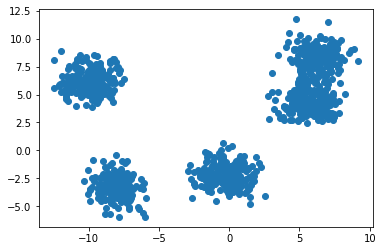

In [68]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [65]:
k = 5

colors = ['pink','blue','green','red','orange']

clusters = {}

for ix in range(k):
    center = 10.0*(2*np.random.random( (X.shape[1],) ) -1)
    points = []
    
    cluster = {
        "center" : center,
        "points" : points,
        "color" : colors[ix]        
    }
    
    clusters[ix] = cluster
    
print (clusters)

{0: {'center': array([ 6.63167502, -5.52260599]), 'points': [], 'color': 'pink'}, 1: {'center': array([9.5565269 , 8.25042915]), 'points': [], 'color': 'blue'}, 2: {'center': array([-7.73249569, -3.51756486]), 'points': [], 'color': 'green'}, 3: {'center': array([-7.04284388, -1.2865384 ]), 'points': [], 'color': 'red'}, 4: {'center': array([ 4.28420744, -8.03951463]), 'points': [], 'color': 'orange'}}


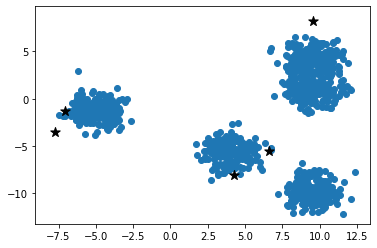

In [66]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
for ix in range(k):
    plt.scatter(clusters[ix]["center"][0], clusters[ix]["center"][1], color = "black", marker = "*", s=100)
plt.show()

In [50]:
def distance(v1,v2):
    return np.sqrt( np.sum( (v1-v2)**2 ) )

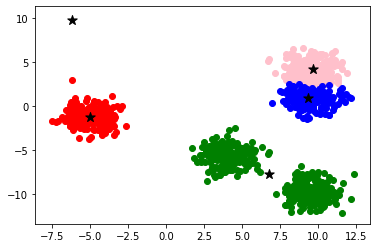

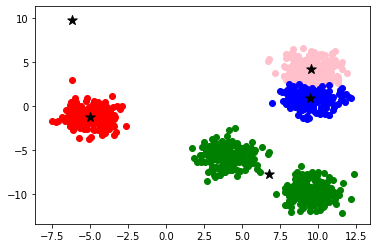

In [62]:
for ix in range(X.shape[0]):
    
    dis = []
    curr_p = X[ix]
    
    for kx in range(k):
        d = distance(curr_p, clusters[kx]["center"])
        dis.append(d)
        
    assined_cluster = np.argmin(dis)
        
    clusters[assined_cluster]["points"].append(curr_p)

    
for kx in range(k):
    pnts = np.array(clusters[kx]["points"])
    
    clusters[kx]["coords"] = pnts
    
plt.figure(0)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"])
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    

for kx in range(k):
    
    if clusters[kx]["coords"].shape[0]>0:
        new_center = clusters[kx]["coords"].mean(axis=0)
    else:
        new_center = clusters[kx]["center"]
        
    clusters[kx]["center"] = new_center
    clusters[kx]["points"] = []
    
plt.figure(1)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"])
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    
plt.show()    